In [2]:
from Annotation_helper import *

In [3]:
matches = pd.read_csv("Matches/Bas3.csv", index_col=0)
# dist_folder = "Distances_jw"
dist_folder = "filtered_Distances"

In [4]:
transactions = load_transactions("../../Data/structured_data\VOC Cochin Slave Transactions 1706-1801 - IISH - Database - 2018 - v1.csv")
permissions = load_permissions("../../Data/structured_data\VOC Cochin Slave Transport Permissions 1770-1795 - IISH - Database - 2018 - v1.csv")

In [5]:
distances = pd.read_csv(dist_folder + "/distances_0.csv", dtype={'permission_indx': 'uint16', 'transaction_indx': 'uint16', 'SlaafGender': 'bool', 'SlaafNaamNieuw': 'float16', 'BezitterGender': 'bool', 'BezitterVoornaam': 'float16', 'BezitterBeroep': 'float16', 'BezitterAchternaam': 'float16'})
for i in range(1, 99):
    df2 = pd.read_csv(f"{dist_folder}/distances_{i}.csv", dtype={'permission_indx': 'uint16', 'transaction_indx': 'uint16', 'SlaafGender': 'bool', 'SlaafNaamNieuw': 'float16', 'BezitterGender': 'bool', 'BezitterVoornaam': 'float16', 'BezitterBeroep': 'float16', 'BezitterAchternaam': 'float16'})
    distances = pd.concat([distances, df2])
distances.reset_index(inplace=True)

In [6]:
distances

,index,permission_indx,transaction_indx,SlaafGender,SlaafNaamNieuw,BezitterGender,BezitterVoornaam,BezitterTussen,BezitterAchternaam,BezitterBeroep,BezitterStatus,BezitterEtniciteit
0,0,0,0,True,0.000000,False,0.000000,0.0,0.000000,0.0,0.0,0.0
1,1,0,1,True,0.250000,False,0.000000,0.0,0.000000,0.0,0.0,0.0
2,2,0,2,False,0.166626,False,0.000000,0.0,0.000000,0.0,0.0,0.0
3,3,0,3,True,0.111084,False,0.000000,0.0,0.000000,0.0,0.0,0.0
4,4,0,4,True,0.142822,False,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26638723,265951,3889,7192,True,0.250000,True,0.166626,0.0,0.166626,0.0,0.0,1.0
26638724,265952,3889,7193,False,0.250000,True,0.166626,0.0,0.166626,0.0,0.0,1.0
26638725,265953,3889,7194,False,0.000000,True,0.277832,0.0,0.000000,0.0,0.0,1.0
26638726,265954,3889,7195,False,0.000000,True,0.166626,0.0,0.166626,0.0,0.0,1.0


In [7]:
matches[matches["transaction_indx"] != 'None']

,Annotator,transaction_indx,permission_indx
30,Bas,4097,32
31,Bas,4242,33
32,Bas,4242,33
33,Bas,4228,34
37,Bas,4220,38
...,...,...,...
364,Bas,2808,353
365,Bas,4313,353
366,Bas,4257,354
367,Bas,4312,354


In [8]:
def count_missing_matches(distances, matches):
    count = 0
    real_matches = matches[matches["transaction_indx"] != 'None']
    for i, match in real_matches.iterrows():
        res = distances.query(f"transaction_indx == {match['transaction_indx']} & permission_indx == {match['permission_indx']}").index
        if len(res) == 0:
            count += 1
    return count
count_missing_matches(distances[distances["SlaafNaamNieuw"] > 0.2], matches)

1

In [9]:
def test_thresholds(distances, matches, column):
    n_matches = matches[matches["transaction_indx"] != 'None'].shape[0]


    data_size = [1]
    n_missing_matches = [0]
    x = [0]
    for i in range(1,10):
        filtered = distances[distances[column] > i/10]
        n_missing_matches.append(count_missing_matches(filtered, matches)/n_matches)
        x.append(i/10)

        data_size.append(filtered.shape[0]/distances.shape[0])
    return (data_size, n_missing_matches, x)

In [22]:
distances.columns

Index(['index', 'permission_indx', 'transaction_indx', 'SlaafGender',
       'SlaafNaamNieuw', 'BezitterGender', 'BezitterVoornaam',
       'BezitterTussen', 'BezitterAchternaam', 'BezitterBeroep',
       'BezitterStatus', 'BezitterEtniciteit'],
      dtype='object')

In [34]:
data_size

[1,
 0.31296032603358537,
 0.10540627165080856,
 0.03175793528880208,
 0.011226286780660098,
 0.005154187542288055,
 0.0040906983246347195,
 0.003611658935066269,
 0.0031352097592647816,
 0.0014022065918462773]

In [35]:
n_missing_matches

[0,
 0.2777777777777778,
 0.2916666666666667,
 0.2916666666666667,
 0.3333333333333333,
 0.3472222222222222,
 0.3888888888888889,
 0.3888888888888889,
 0.4166666666666667,
 0.5]

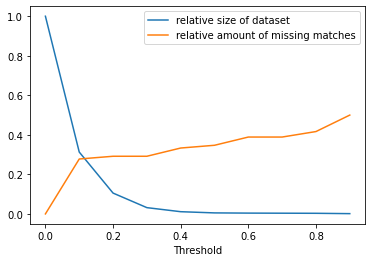

In [33]:
blocking_col = 'BezitterBeroep'
data_size, n_missing_matches, x = test_thresholds(distances, matches, blocking_col)
plt.plot(x, data_size, label='relative size of dataset')
plt.plot(x, n_missing_matches, label='relative amount of missing matches')
plt.xlabel("Threshold")
plt.legend()
plt.savefig("../Figures/Method/Blocking.jpg")
plt.show()

In [20]:
new_dist = distances[distances["SlaafNaamNieuw"] > 0.3]

In [14]:
d = distances
d = d[d["SlaafNaamNieuw"] > 0.3]
d = d[d["SlaafGender"] > 0.3]
d = d[d["BezitterAchternaam"] > 0.1]
d = d[d["BezitterVoornaam"] > 0.1]

In [15]:
distances.shape[0]

26638728

In [16]:
d.shape[0]

367360

In [17]:
d

,index,permission_indx,transaction_indx,SlaafGender,SlaafNaamNieuw,BezitterGender,BezitterVoornaam,BezitterTussen,BezitterAchternaam,BezitterBeroep,BezitterStatus,BezitterEtniciteit
172757,172757,24,245,True,0.399902,True,0.142822,0.0,0.199951,0.103882,0.0,0.0
172759,172759,24,247,True,0.333252,True,0.142822,0.0,0.199951,0.103882,0.0,0.0
172771,172771,24,259,True,0.600098,True,0.142822,0.0,0.166626,0.333252,0.0,0.0
172856,172856,24,344,True,0.399902,True,0.142822,0.0,0.250000,0.000000,0.0,0.0
172889,172889,24,377,True,0.399902,True,0.111084,0.0,0.250000,0.160034,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26637617,264845,3889,6081,True,0.500000,True,0.111084,0.0,0.166626,0.000000,0.0,0.0
26638036,265264,3889,6500,True,0.333252,True,0.166626,0.0,0.333252,0.000000,0.0,0.0
26638309,265537,3889,6773,True,1.000000,True,0.111084,0.0,0.333252,0.000000,0.0,0.0
26638423,265651,3889,6887,True,0.375000,True,0.285645,0.0,0.166626,0.000000,0.0,1.0


In [16]:
distances[distances["SlaafNaamNieuw"] > 0.3][['permission_indx', 'transaction_indx']]

,permission_indx,transaction_indx
10,0,10
20,0,20
22,0,22
30,0,30
38,0,38
...,...,...
26638690,3889,7159
26638691,3889,7160
26638703,3889,7172
26638717,3889,7186


In [36]:
d = distances
d = d[d["SlaafNaamNieuw"] > 0.3]
d = d[d["SlaafGender"] > 0.3]
d = d[d["BezitterAchternaam"] > 0.1]
d = d[d["BezitterVoornaam"] > 0.6]
d

,index,permission_indx,transaction_indx,SlaafGender,SlaafNaamNieuw,BezitterGender,BezitterVoornaam,BezitterTussen,BezitterAchternaam,BezitterBeroep,BezitterStatus,BezitterEtniciteit
173655,173655,24,1143,True,0.600098,True,1.000000,0.0,0.142822,0.000000,0.0,0.0
185629,185629,26,5933,True,1.000000,True,0.799805,0.0,0.142822,0.000000,0.0,0.0
196131,196131,28,2057,True,0.555664,True,1.000000,0.0,0.199951,0.199951,0.0,0.0
203319,203319,29,2057,True,0.555664,True,1.000000,0.0,0.199951,0.199951,0.0,0.0
216328,216328,31,688,True,1.000000,True,0.636230,0.0,0.142822,0.115356,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26591775,219003,3883,3365,True,0.399902,True,1.000000,0.0,0.272705,0.125000,0.0,0.0
26598762,225990,3884,3164,True,1.000000,True,0.866699,0.0,0.500000,0.000000,0.0,0.0
26598809,226037,3884,3211,True,0.399902,True,0.866699,0.0,0.500000,0.000000,0.0,0.0
26600335,227563,3884,4738,True,0.333252,True,0.866699,0.0,0.500000,0.000000,0.0,0.0


In [38]:
d[['permission_indx', 'transaction_indx']].to_csv("../../Data/structured_data/blocked_possible_matches.csv")

In [39]:
d

,index,permission_indx,transaction_indx,SlaafGender,SlaafNaamNieuw,BezitterGender,BezitterVoornaam,BezitterTussen,BezitterAchternaam,BezitterBeroep,BezitterStatus,BezitterEtniciteit
173655,173655,24,1143,True,0.600098,True,1.000000,0.0,0.142822,0.000000,0.0,0.0
185629,185629,26,5933,True,1.000000,True,0.799805,0.0,0.142822,0.000000,0.0,0.0
196131,196131,28,2057,True,0.555664,True,1.000000,0.0,0.199951,0.199951,0.0,0.0
203319,203319,29,2057,True,0.555664,True,1.000000,0.0,0.199951,0.199951,0.0,0.0
216328,216328,31,688,True,1.000000,True,0.636230,0.0,0.142822,0.115356,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26591775,219003,3883,3365,True,0.399902,True,1.000000,0.0,0.272705,0.125000,0.0,0.0
26598762,225990,3884,3164,True,1.000000,True,0.866699,0.0,0.500000,0.000000,0.0,0.0
26598809,226037,3884,3211,True,0.399902,True,0.866699,0.0,0.500000,0.000000,0.0,0.0
26600335,227563,3884,4738,True,0.333252,True,0.866699,0.0,0.500000,0.000000,0.0,0.0
